# List of Contents
### 01. Importing Libraries
### 02. Importing Dataframes
### 03. Task

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframes

In [2]:
#path = project pathway
path= r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 4/InstaCart Basket Analysis'

In [3]:
# most up to date orders-products dataframe
df_ords_prods= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_3.pkl'))

In [4]:
# cleaned customers datafram
df_cust= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_checked.pkl'))

# 03. Task

### Q.3

In [5]:
df_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_order_frequency,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,9.0,Mid-range product,Regular Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,9.0,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [6]:
df_cust.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


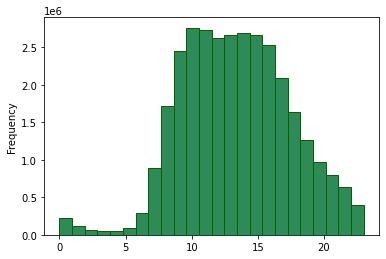

In [5]:
#descriptive findings about sales
hist_hour_of_day= df_ords_prods['order_hour_of_day'].plot.hist(bins=24, color='seagreen', edgecolor='darkgreen')

In [7]:
#export histogram
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

#### The histogram shows the number of orders that are received throughout a 24-hour day (0=1am, 23=12am). This histogram shows that the most amount of orders occurs between 10-15.

### Q4.

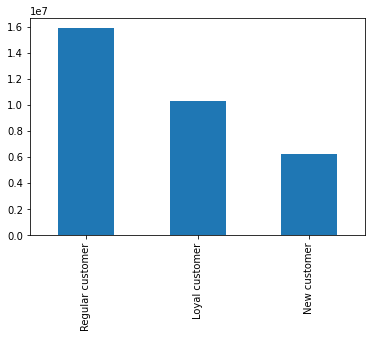

In [8]:
#distribution of orders among customers in terms of loyalty
bar_loyalty= df_ords_prods['loyalty_flag'].value_counts().plot.bar()

#### The bar chart shows that a majority of orders come from regular customers, and the least amount of orders come from new customers.

### Q5.

In [9]:
#Sample of prices
#create a list holding true/false values to test np.random.rand() <=0.7
#true= <=0.7
#false= >0.7
np.random.seed(4)
dev= np.random.rand(len(df_ords_prods)) <=0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
#store 70% of sample in big dataframe
big= df_ords_prods[dev]

In [12]:
#store 30% of sample in small dataframe
small= df_ords_prods[~dev]

In [13]:
len(df_ords_prods)

32404859

In [14]:
len(big) + len(small)

32404859

In [15]:
#subset with only prices and order_hour_of_day
df_2= small[['order_hour_of_day', 'prices']]

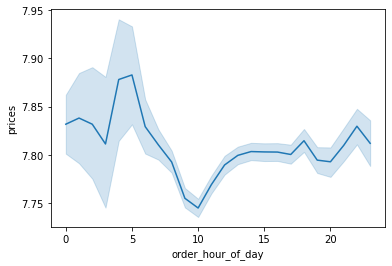

In [16]:
#create lineplot
line_price_hour= sns.lineplot(data= df_2, x='order_hour_of_day', y= 'prices')

#### The lineplot show that the highest expenditure occurs at 5

### Q6.

#### Customer Demographics

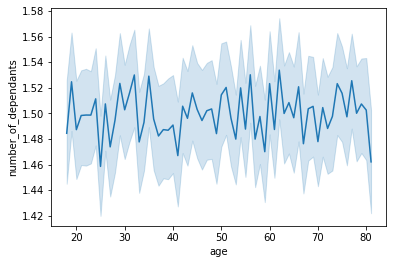

In [17]:
#Is there a connection between age/family situation?
line_age_dependents= sns.lineplot(data= df_cust, x='age', y='number_of_dependants')

#### There is not a consistent trend for the number of dependants a person might have in reference to their age

### Q7.

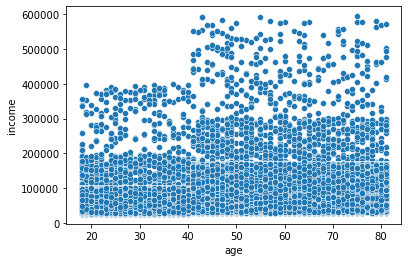

In [19]:
#Is there a connection between age/spending power?
scatter_age_income= sns.scatterplot(x='age', y='income', data=df_cust)

#### The scatterplot above shows that the older you are, the more spending power (income) you have. By age forty, your oportunity for a higher income increases by 20000.

### Q8

In [6]:
#export visualizations as .png files
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hour.png'))
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

NameError: name 'bar_loyalty' is not defined